In [61]:
import cv2
import sys
import pytesseract


In [62]:
from scipy import ndimage

In [63]:
import matplotlib.pyplot as plt

In [78]:
img=cv2.imread('Indian-Number-Plate-Recognition-System-master/testData/test7.jpg')
#img=cv2.imread('Indian-Number-Plate-Recognition-System-master/testData/test4.jpg')
#img=cv2.imread('Indian-Number-Plate-Recognition-System-master/testData/test.jpeg')

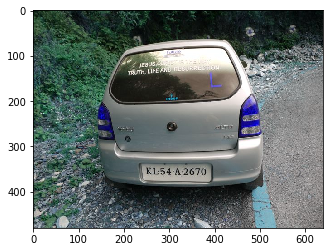

In [79]:
plt.imshow(img)

In [80]:
gaussblur = cv2.GaussianBlur(img,(5,5),0)

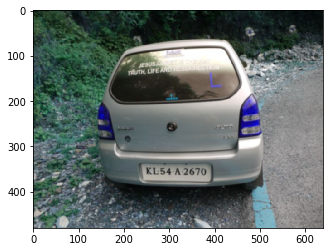

In [81]:
plt.imshow(gaussblur)

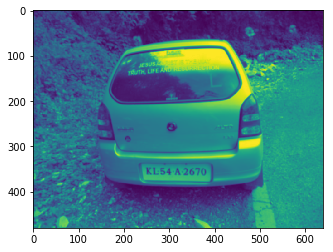

In [82]:
img_gray = cv2.cvtColor(gaussblur,cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray)

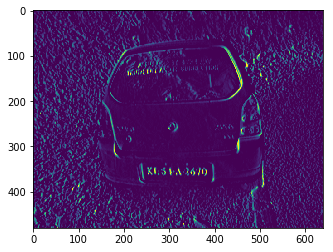

In [83]:
sobelx = cv2.Sobel(img_gray,cv2.CV_8U,1,0,ksize=3)
plt.imshow(sobelx)

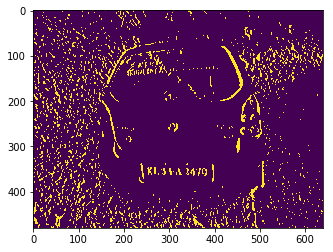

In [84]:
ret2,threshold_img = cv2.threshold(sobelx,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.imshow(threshold_img)

[[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]]


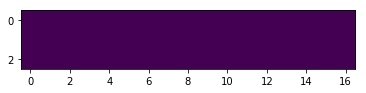

In [85]:
element = cv2.getStructuringElement(shape=cv2.MORPH_RECT, ksize=(17, 3))
print(element)
plt.imshow(element)

In [86]:
morph_img_threshold = threshold_img.copy()
cv2.morphologyEx(src=threshold_img, op=cv2.MORPH_CLOSE, kernel=element, dst=morph_img_threshold)
im2,contours, hierarchy= cv2.findContours(morph_img_threshold,mode=cv2.RETR_EXTERNAL,method=cv2.CHAIN_APPROX_NONE)

In [87]:
import numpy as np
from PIL import Image
import pytesseract as tess

In [88]:
def ratioCheck(area, width, height):
	ratio = float(width) / float(height)
	if ratio < 1:
		ratio = 1 / ratio
	aspect = 4.7272
	min = 15*aspect*15  # minimum area
	max = 125*aspect*125  # maximum area
	rmin = 3
	rmax = 6
	if (area < min or area > max) or (ratio < rmin or ratio > rmax):
		return False
	return True

def isMaxWhite(plate):
	avg = np.mean(plate)
    #print(avg)
	if(avg>=100):
		return True
	else:
 		return False

def validateRotationAndRatio(rect):
	(x, y), (width, height), rect_angle = rect

	if(width>height):
		angle = -rect_angle
	else:
		angle = 90 + rect_angle

	if angle>15:
	 	return False

	if height == 0 or width == 0:
		return False

	area = height*width
	if not ratioCheck(area,width,height):
		return False
	else:
		return True
def cleanPlate(plate):
	print "CLEANING PLATE. . ."
	gray = cv2.cvtColor(plate, cv2.COLOR_BGR2GRAY)
	#kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3))
	#thresh= cv2.dilate(gray, kernel, iterations=1)

	_, thresh = cv2.threshold(gray, 130, 255, cv2.THRESH_BINARY)
	im1,contours,hierarchy = cv2.findContours(thresh.copy(),cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

	if contours:
		areas = [cv2.contourArea(c) for c in contours]
		max_index = np.argmax(areas)

		max_cnt = contours[max_index]
		max_cntArea = areas[max_index]
		x,y,w,h = cv2.boundingRect(max_cnt)

		if not ratioCheck(max_cntArea,w,h):
			return plate,None

		cleaned_final = thresh[y:y+h, x:x+w]
		#cv2.imshow("Function Test",cleaned_final)
		return cleaned_final,[x,y,w,h]

	else:
		return plate,None


CLEANING PLATE. . .
Detected Text :  
CLEANING PLATE. . .
Detected Text :  [KL54-A-2670"


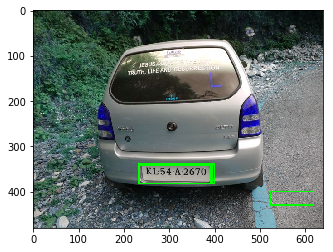

In [95]:
for i,cnt in enumerate(contours):
    min_rect = cv2.minAreaRect(cnt)
    if validateRotationAndRatio(min_rect):
        x,y,w,h = cv2.boundingRect(cnt)
        plate_img = img[y:y+h,x:x+w]
        plimg=plate_img
        kernels = np.ones((1,1), np.uint8)
        #print("Checkpint 1")
        #dilation = cv2.dilate(plate_img,kernels,iterations = 1)
        img_erosion = cv2.erode(plate_img, kernel=kernels, iterations=1)
        #print("Checkpint 2")
        if(isMaxWhite(img_erosion)):
            #print("Checkpint 3")
            clean_plate, rect = cleanPlate(img_erosion)
            if rect:
                x1,y1,w1,h1 = rect
                x,y,w,h = x+x1,y+y1,w1,h1#Imshow
                #print("Checkpint 4")
                plate_im = Image.fromarray(clean_plate)#cv2.imshow("Cleaned Plate",clean_plate)
                #print("Checkpint 5")
                text = tess.image_to_string(plate_im, lang='eng')
                #print("Checkpint 6")
                if text !=' ':
                    print "Detected Text : ",text
                img = cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
                #cv2.imshow("Detected Plate",img)
                plt.imshow(img)#cv2.waitKey(0)

CLEANING PLATE. . .
Detected Text :  
CLEANING PLATE. . .
Detected Text :  [KL54-A-2670"


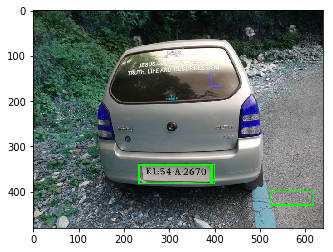

In [92]:
for i,cnt in enumerate(contours):
    min_rect = cv2.minAreaRect(cnt)
    if validateRotationAndRatio(min_rect):
        x,y,w,h = cv2.boundingRect(cnt)
        plate_img = img[y:y+h,x:x+w]
        plimg=plate_img
        
        kernels = np.ones((2,2), np.uint8)
        kernelersoin = np.ones((1,1), np.uint8)
        dilation = cv2.dilate(plimg,kernels,iterations = 1)
        img_erosion = cv2.erode(plate_img, kernel=kernelersoin, iterations=1)
        #dilation = cv2.dilate(plate_img,kernels,iterations = 1)
        if(isMaxWhite(img_erosion)):
            clean_plate, rect = cleanPlate(img_erosion)
            if rect:
                x1,y1,w1,h1 = rect
                x,y,w,h = x+x1,y+y1,w1,h1#Imshow
                plate_im = Image.fromarray(clean_plate)#cv2.imshow("Cleaned Plate",clean_plate)
                text = tess.image_to_string(plate_im, lang='eng')
                if text !=' ':
                    print "Detected Text : ",text
                img = cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
                #cv2.imshow("Detected Plate",img)
                plt.imshow(img)#cv2.waitKey(0)

In [40]:
alpha=2
beta=20
brighim=cv2.addWeighted(img_gray,alpha,np.zeros(img_gray.shape,img_gray.dtype),0,beta)

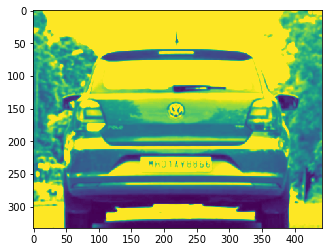

In [41]:
plt.imshow(brighim)

In [42]:
hist,bins = np.histogram(brighim.flatten(),256,[0,256])

In [43]:
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

In [44]:
cdf_normalized = cdf * hist.max()/ cdf.max()


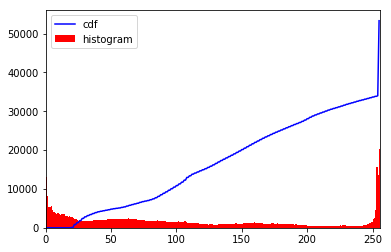

In [45]:
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.plot(cdf_normalized, color = 'b')
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.xlim([0,256])
plt.show()

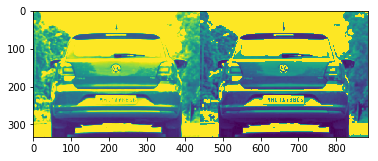

In [46]:
equ = cv2.equalizeHist(brighim)
res = np.hstack((brighim,equ))
plt.imshow(res)


In [ ]:
edges = cv2.Canny(res,100,200)
plt.imshow(edges)

In [ ]:
ret, thresh = cv2.threshold(edges,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
plt.imshow(thresh)

In [ ]:
import scipy
from scipy import ndimage

In [ ]:
blur_radius = 1.0
threshold = 50

In [ ]:

# smooth the image (to remove small objects)
imgf = ndimage.gaussian_filter(thresh, blur_radius)
plt.imshow(imgf)

In [ ]:
ret, labels = cv2.connectedComponents(thresh,connectivity=8)


In [16]:
# Map component labels to hue val
label_hue = np.uint8(179*labels/np.max(labels))
blank_ch = 255*np.ones_like(label_hue)
labeled_img = cv2.merge([label_hue, blank_ch, blank_ch])

# cvt to BGR for display
labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR)

NameError: name 'labels' is not defined

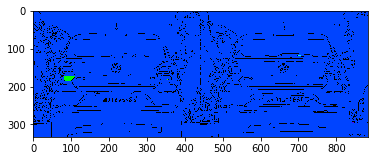

In [238]:
labeled_img[label_hue==0] = 0
plt.imshow(labeled_img)

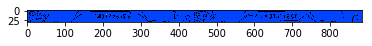

In [239]:
plt.imshow(labeled_img[220:250])

In [240]:
#width, height = cv2.GetSize(labeled_img)
#print width
#print height
labeled_img.shape

(333, 884, 3)

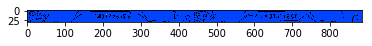

In [241]:
plt.imshow(labeled_img[220:250])